### Import Libraries and Datasets

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

### Import subdatasets 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Reshape to add the channel dimension
##### Display the shape of dataset. The output shows the number of samples and the dimensions (height and width) of each image in pixels (28x28).

In [5]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Print the shapes to confirm
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


##### Display one of datasets

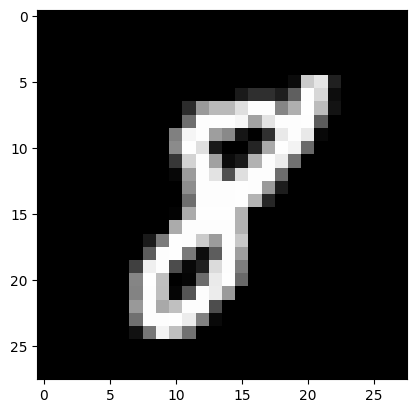

In [6]:
# Display the 10th image in the training set
plt.imshow(x_train[17].reshape(28, 28), cmap='gray')
plt.show()

### Preprossing Data

In [7]:
# Reshape and normalize the training and testing data
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

### Model Definition

In [8]:
# Define the model
model = keras.Sequential()

# Conv2D layer + Batch Normalization + Activation + Dropout
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))  # 30% dropout after first max pooling

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))  # 30% dropout after second max pooling

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))  # 30% dropout after third max pooling

model.add(keras.layers.Flatten())

# Fully Connected Layers with Dropout
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))  # 50% dropout after first dense layer

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))  # 50% dropout after second dense layer

model.add(keras.layers.Dense(units=10, activation='softmax'))  # 10 units for 10 classes in MNIST


# Compile the model

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\Roja\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Summary of Dataset

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,370 (247.54 KB)

 Trainable params: 62,410 (243.79 KB)

 Non-trainable params: 960 (3.75 KB)

### Training with a Validation Split

In [10]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, 
                    validation_split=0.25)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1844 - loss: 2.9920 - val_accuracy: 0.6463 - val_loss: 1.1203
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4480 - loss: 1.6736 - val_accuracy: 0.7811 - val_loss: 0.6882
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6070 - loss: 1.1489 - val_accuracy: 0.8800 - val_loss: 0.4474
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7168 - loss: 0.8499 - val_accuracy: 0.9232 - val_loss: 0.2807
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7947 - loss: 0.6527 - val_accuracy: 0.9403 - val_loss: 0.2075
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8387 - loss: 0.5213 - val_accuracy: 0.9477 - val_loss: 0.1719
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8629 - loss: 0.4435 - val_accuracy: 0.9552 - val_loss: 0.1435
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8825 -

### Plotting 

<function matplotlib.pyplot.show(close=None, block=None)>

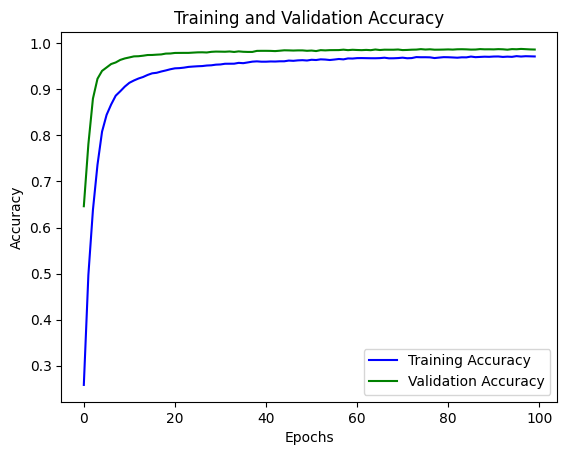

In [12]:
# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show

### Evaluate the model on the test data

313/313 - 1s - 2ms/step - accuracy: 0.9880 - loss: 0.0423
Test Accuracy: 98.80%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy for digit 0: 99.39%
Accuracy for digit 1: 99.82%
Accuracy for digit 2: 98.26%
Accuracy for digit 3: 99.01%
Accuracy for digit 4: 99.29%
Accuracy for digit 5: 98.88%
Accuracy for digit 6: 98.85%
Accuracy for digit 7: 98.05%
Accuracy for digit 8: 98.67%
Accuracy for digit 9: 97.72%


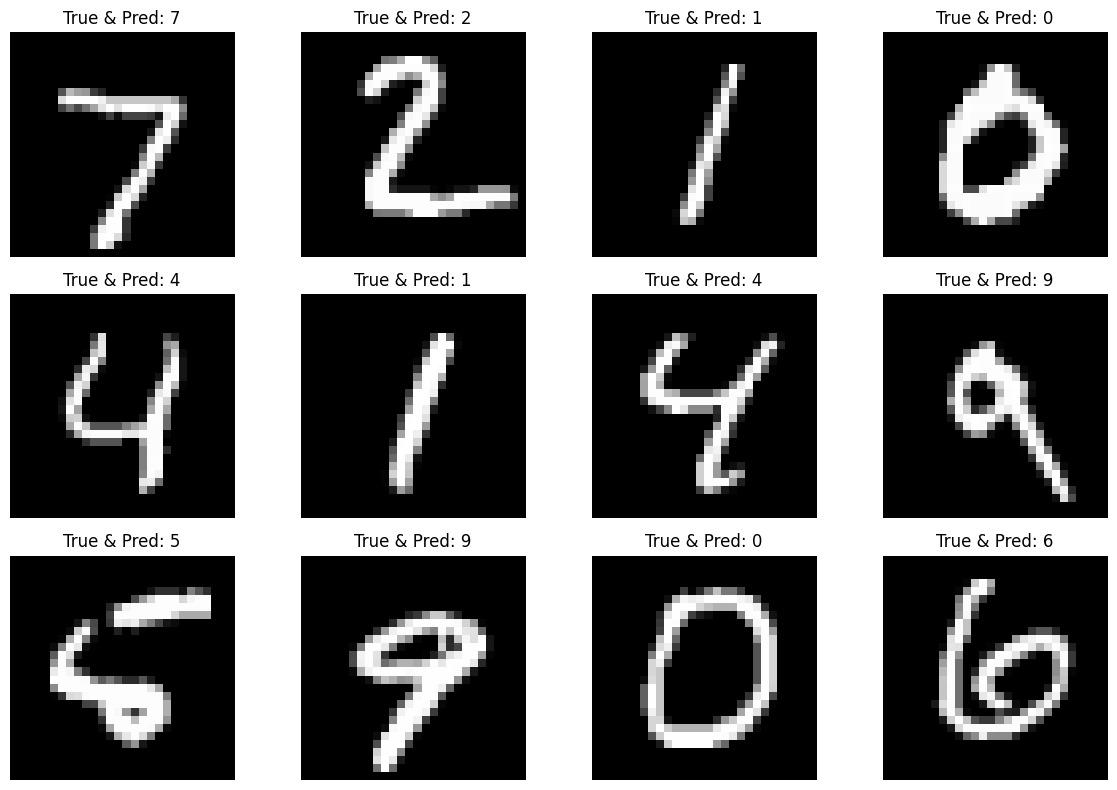

In [13]:
# Step 1: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 2: Generate predictions
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)

# Check accuracy by class
import numpy as np
class_accuracy = []
for digit in range(10):
    indices = np.where(y_test == digit)[0]
    class_correct = np.sum(predicted_classes[indices] == y_test[indices])
    class_accuracy.append(class_correct / len(indices) * 100)
    print(f"Accuracy for digit {digit}: {class_accuracy[-1]:.2f}%")

# Step 3: Visualize some correctly classified examples
correctly_classified_indices = [i for i, (true, pred) in enumerate(zip(y_test, predicted_classes)) if true == pred]

plt.figure(figsize=(12, 8))
for i, index in enumerate(correctly_classified_indices[:12]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True & Pred: {y_test[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()




### Evaluation of the model using confusion metrix

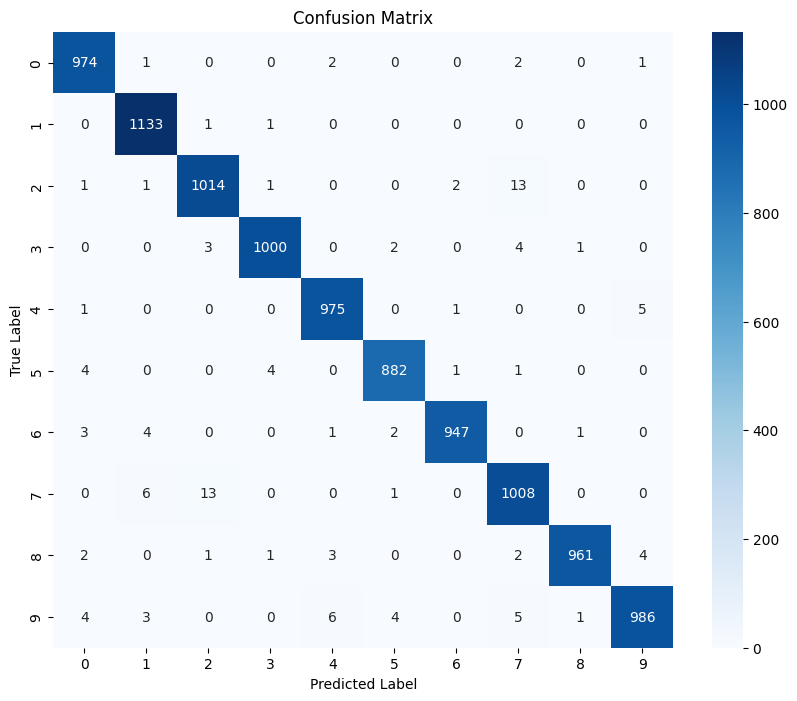

Class 0:
  True Positives (TP): 974
  False Positives (FP): 15
  False Negatives (FN): 6
  True Negatives (TN): 9005

Class 1:
  True Positives (TP): 1133
  False Positives (FP): 15
  False Negatives (FN): 2
  True Negatives (TN): 8850

Class 2:
  True Positives (TP): 1014
  False Positives (FP): 18
  False Negatives (FN): 18
  True Negatives (TN): 8950

Class 3:
  True Positives (TP): 1000
  False Positives (FP): 7
  False Negatives (FN): 10
  True Negatives (TN): 8983

Class 4:
  True Positives (TP): 975
  False Positives (FP): 12
  False Negatives (FN): 7
  True Negatives (TN): 9006

Class 5:
  True Positives (TP): 882
  False Positives (FP): 9
  False Negatives (FN): 10
  True Negatives (TN): 9099

Class 6:
  True Positives (TP): 947
  False Positives (FP): 4
  False Negatives (FN): 11
  True Negatives (TN): 9038

Class 7:
  True Positives (TP): 1008
  False Positives (FP): 27
  False Negatives (FN): 20
  True Negatives (TN): 8945

Class 8:
  True Positives (TP): 961
  False Positi

In [15]:
# Generate predictions
predicted_classes = predictions.argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN) for each class
TP = np.diag(conf_matrix)  # True Positives are the diagonal elements
FP = np.sum(conf_matrix, axis=0) - TP  # False Positives are the column sums excluding the diagonal
FN = np.sum(conf_matrix, axis=1) - TP  # False Negatives are the row sums excluding the diagonal
TN = np.sum(conf_matrix) - (FP + FN + TP)  # True Negatives are all other elements

# Print TP, FP, FN, and TN for each class
for i in range(len(TP)):
    print(f"Class {i}:")
    print(f"  True Positives (TP): {TP[i]}")
    print(f"  False Positives (FP): {FP[i]}")
    print(f"  False Negatives (FN): {FN[i]}")
    print(f"  True Negatives (TN): {TN[i]}\n")

# Display Classification Report for Precision, Recall, and F1-Score
class_report = classification_report(y_test, predicted_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)